<a href="https://colab.research.google.com/github/manhduyy/Stock-Price-Prediction3/blob/test1/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dự đoán giá cổ phiếu bằng mô hình Hồi quy tuyến tính và mô hình Random Forest theo Ensemble Learning**:



**Bước 1 : Khai báo thư viện**

In [ ]:
# Import các thư viện cần thiết
import pandas as pd  # Thư viện để làm việc với dữ liệu dạng bảng (dataframe)
import numpy as np   # Thư viện để thực hiện các phép toán số học
import matplotlib.pyplot as plt  # Thư viện để vẽ biểu đồ
from sklearn.model_selection import train_test_split  # Thư viện để chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.linear_model import LinearRegression  # Thư viện cho mô hình hồi quy tuyến tính
from sklearn.ensemble import RandomForestRegressor  # Thư viện cho mô hình Random Forest hồi quy
from sklearn.preprocessing import StandardScaler  # Thư viện để chuẩn hóa dữ liệu
from sklearn import metrics  # Thư viện để đánh giá hiệu suất của mô hình

**Bước 2 : Đọc dữ liệu**

In [ ]:
# Đường dẫn đến tệp dữ liệu, bạn cần đặt tên tệp dữ liệu đã tải lên ở đây
data_path = 'datasetvn30.csv'

# Đọc dữ liệu từ tệp và đặt cột đầu tiên là cột chỉ mục (index)
Stock = pd.read_csv(data_path, index_col=0)

# Sao chép dữ liệu vào biến stock_data để làm việc với dữ liệu gốc
stock_data = Stock

# Hiển thị năm mẫu dữ liệu đầu tiên trong bảng dữ liệu
stock_data=.head()

,Đóng,Mở,Cao,Thấp,Unnamed: 5,Unnamed: 6
Ngày,,,,,,
29/09/2023,"1,166.26","1,169.26","1,176.77","1,165.15",NaN,NaN
28/09/2023,"1,164.45","1,167.96","1,168.09","1,144.47",NaN,NaN
27/09/2023,"1,168.60","1,154.54","1,168.60","1,141.09",NaN,NaN
26/09/2023,"1,153.37","1,161.62","1,174.24","1,152.44",NaN,NaN
25/09/2023,"1,159.94","1,195.36","1,199.65","1,159.94",NaN,NaN


In [ ]:
# Xóa cột
stock_data = stock_data.drop(columns='Unnamed: 5')

In [ ]:
stock_data = stock_data.drop(columns='Unnamed: 6')

Bước 3: Xử lý dữ liệu

In [ ]:
# Loại bỏ dấu ',' và chuyển cột về kiểu số thực (float)
stock_data['Đóng'] = stock_data['Đóng'].str.replace(',', '').astype(float)
stock_data['Mở'] = stock_data['Mở'].str.replace(',', '').astype(float)
stock_data['Cao'] = stock_data['Cao'].str.replace(',', '').astype(float)
stock_data['Thấp'] = stock_data['Thấp'].str.replace(',', '').astype(float)

Bước 4: Mô tả dữ liệu

In [ ]:
# Hiện 5 dòng cuối của tập dữ liệu
stock_data.tail(5)

,Đóng,Mở,Cao,Thấp
Ngày,,,,
8/1/2010,547.50,547.50,547.50,547.50
7/1/2010,560.61,560.61,560.61,560.61
6/1/2010,565.41,565.41,565.41,565.41
5/1/2010,566.65,566.65,566.65,566.65
4/1/2010,550.43,550.43,550.43,550.43


In [ ]:
# In ra kích thước của tập dữ liệu 'stock_data'
stock_data.shape

(3428, 4)

In [ ]:
# In ra các cột của tập dữ liệu
stock_data.columns

Index(['Đóng', 'Mở', 'Cao', 'Thấp'], dtype='object')

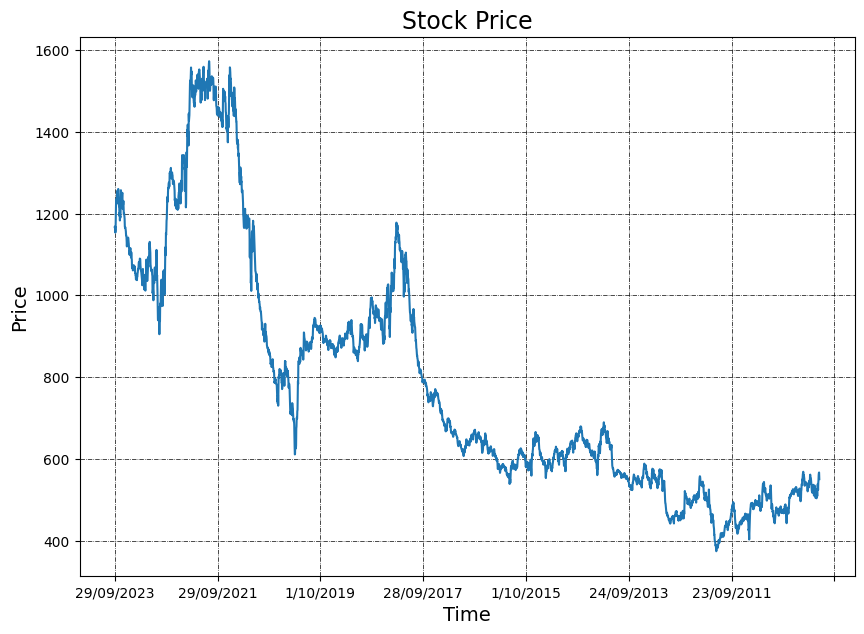

In [ ]:
# Vẽ biểu đồ giá cổ phiếu theo cột 'Đóng'
stock_data['Đóng'].plot(figsize=(10, 7))

# Đặt tiêu đề và nhãn trục cho biểu đồ
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)

# Thêm lưới lên biểu đồ để dễ quan sát
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Hiển thị biểu đồ
plt.show()

**Bước 4: Chia tập dữ liệu**

In [ ]:
def create_train_test_set(stock_data):
    # Tạo tập dữ liệu đặc trưng (features) và biến mục tiêu (target)
    features = stock_data[['Mở', 'Cao', 'Thấp']]
    target = stock_data['Đóng']

    # Tính chiều dài của tập dữ liệu
    data_len = stock_data.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    # Xác định tỷ lệ chia dữ liệu
    train_ratio = 0.88  # Tỷ lệ tập huấn luyện (88%)
    val_ratio = 0.1    # Tỷ lệ tập validation (10%)
    test_ratio = 0.02  # Tỷ lệ tập kiểm tra (2%)

    # Tính số lượng mẫu cho từng tập
    train_samples = int(data_len * train_ratio)
    val_samples = int(data_len * val_ratio)
    test_samples = int(data_len * test_ratio)

    # Tạo các tập dữ liệu dựa trên tỷ lệ
    X_train, X_val, X_test = features[:train_samples], features[train_samples:(train_samples + val_samples)], features[(train_samples + val_samples):]
    Y_train, Y_val, Y_test = target[:train_samples], target[train_samples:(train_samples + val_samples)], target[(train_samples + val_samples):]

    # In kích thước của các tập dữ liệu
    print('Training Set length - ', str(train_samples))
    print('Validation Set length - ', str(val_samples))
    print('Test Set length - ', str(test_samples))

    return X_train, X_val, X_test, Y_train, Y_val, Y_test


In [ ]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(stock_data)

Historical Stock Data length is -  3428
Training Set length -  3016
Validation Set length -  342
Test Set length -  68


In [ ]:
# Kích thước của từng tập dữ liệu sau khi chia
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (3016, 3)
X_test shape: (70, 3)
Y_train shape: (3016,)
Y_test shape: (70,)


**Bước 5: Huấn luyện**

In [ ]:
# Nhập mô hình hồi quy tuyến tính từ thư viện sklearn
from sklearn.linear_model import LinearRegression

# Tạo một mô hình hồi quy tuyến tính
lr = LinearRegression()

# Huấn luyện mô hình trên tập dữ liệu huấn luyện (X_train, Y_train)
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# In các hệ số hồi quy tuyến tính
print('LR Coefficients: \n', lr.coef_)

# In điểm cắt (intercept) của hồi quy tuyến tính
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [-0.70665779  0.9886359   0.71655307]
LR Intercept: 
 0.03849261776997537


In [ ]:
# Khởi tạo mô hình Random Forest với 100 cây quyết định (n_estimators=100) và đặt seed (random_state) là 42
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình Random Forest bằng dữ liệu huấn luyện (X_train, Y_train)
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# In các hệ số của mô hình Random Forest
print('Random Forest Feature Importances: \n', rf.feature_importances_)

Random Forest Feature Importances: 
 [0.01135637 0.36703704 0.62160658]


**Bước 6: Đánh giá mô hình và dự đoán**

In [ ]:
# Tính hệ số xác định (R-squared) của mô hình dự đoán trên tập dữ liệu huấn luyện
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.999778653190093


In [ ]:
def get_mape(y_true, y_pred):
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Dự đoán giá cổ phiếu bằng Linear Regression trên các tập dữ liệu

# Dự đoán giá cổ phiếu trên tập dữ liệu huấn luyện và validation
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)

# Dự đoán giá cổ phiếu trên tập dữ liệu kiểm tra
Y_test_pred = lr.predict(X_test)

In [ ]:
# Đánh giá hiệu suất của mô hình hồi quy tuyến tính trên các tập dữ liệu

# Đánh giá hiệu suất trên tập dữ liệu huấn luyện
print("Training R-squared: ", round(metrics.r2_score(Y_train, Y_train_pred), 2))
print("Training Explained Variation: ", round(metrics.explained_variance_score(Y_train, Y_train_pred), 2))
print('Training MAPE:', round(get_mape(Y_train, Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train, Y_train_pred), 2))
print("Training RMSE: ", round(np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)), 2))
print("Training MAE: ", round(metrics.mean_absolute_error(Y_train, Y_train_pred), 2))

print(' ')

# Đánh giá hiệu suất trên tập dữ liệu validation
print("Validation R-squared: ", round(metrics.r2_score(Y_val, Y_val_pred), 2))
print("Validation Explained Variation: ", round(metrics.explained_variance_score(Y_val, Y_val_pred), 2))
print('Validation MAPE:', round(get_mape(Y_val, Y_val_pred), 2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_val, Y_val_pred), 2))
print("Validation RMSE: ", round(np.sqrt(metrics.mean_squared_error(Y_val, Y_val_pred)), 2))
print("Validation MAE: ", round(metrics.mean_absolute_error(Y_val, Y_val_pred), 2))

print(' ')

# Đánh giá hiệu suất trên tập dữ liệu kiểm tra
print("Test R-squared: ", round(metrics.r2_score(Y_test, Y_test_pred), 2))
print("Test Explained Variation: ", round(metrics.explained_variance_score(Y_test, Y_test_pred), 2))
print('Test MAPE:', round(get_mape(Y_test, Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test, Y_test_pred), 2))
print("Test RMSE: ", round(np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)), 2))
print("Test MAE: ", round(metrics.mean_absolute_error(Y_test, Y_test_pred), 2))


Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.34
Training Mean Squared Error: 19.78
Training RMSE:  4.45
Training MAE:  2.92
 
Validation R-squared:  1.0
Validation Explained Variation:  1.0
Validation MAPE: 0.14
Validation Mean Squared Error: 0.46
Validation RMSE:  0.68
Validation MAE:  0.68
 
Test R-squared:  1.0
Test Explained Variation:  1.0
Test MAPE: 0.14
Test Mean Squared Error: 0.55
Test RMSE:  0.74
Test MAE:  0.74


In [ ]:
# Sử dụng mô hình Random Forest để dự đoán giá trị trên các tập dữ liệu

# Dự đoán giá trị trên tập dữ liệu huấn luyện bằng mô hình Random Forest
Y_train_pred_rf = rf.predict(X_train)

# Dự đoán giá trị trên tập dữ liệu validation bằng mô hình Random Forest
Y_val_pred_rf = rf.predict(X_val)

# Dự đoán giá trị trên tập dữ liệu kiểm tra bằng mô hình Random Forest
Y_test_pred_rf = rf.predict(X_test)


In [ ]:
# Đánh giá hiệu suất của mô hình Random Forest trên tập huấn luyện
print("Random Forest Training R-squared: ", round(metrics.r2_score(Y_train, Y_train_pred_rf), 2))
print("Random Forest Training Explained Variation: ", round(metrics.explained_variance_score(Y_train, Y_train_pred_rf), 2))
print('Random Forest Training MAPE:', round(get_mape(Y_train, Y_train_pred_rf), 2))
print('Random Forest Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train, Y_train_pred_rf), 2))
print("Random Forest Training RMSE: ", round(np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred_rf)), 2))
print("Random Forest Training MAE: ", round(metrics.mean_absolute_error(Y_train, Y_train_pred_rf), 2))

print(' ')

# Đánh giá hiệu suất của mô hình Random Forest trên tập validation
print("Random Forest Validation R-squared: ", round(metrics.r2_score(Y_val, Y_val_pred_rf), 2))
print("Random Forest Validation Explained Variation: ", round(metrics.explained_variance_score(Y_val, Y_val_pred_rf), 2))
print('Random Forest Validation MAPE:', round(get_mape(Y_val, Y_val_pred_rf), 2))
print('Random Forest Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_val, Y_val_pred_rf), 2))
print("Random Forest Validation RMSE: ", round(np.sqrt(metrics.mean_squared_error(Y_val, Y_val_pred_rf)), 2))
print("Random Forest Validation MAE: ", round(metrics.mean_absolute_error(Y_val, Y_val_pred_rf), 2))

print(' ')

# Đánh giá hiệu suất của mô hình Random Forest trên tập kiểm tra
print("Random Forest Test R-squared: ", round(metrics.r2_score(Y_test, Y_test_pred_rf), 2))
print("Random Forest Test Explained Variation: ", round(metrics.explained_variance_score(Y_test, Y_test_pred_rf), 2))
print('Random Forest Test MAPE:', round(get_mape(Y_test, Y_test_pred_rf), 2))
print('Random Forest Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test, Y_test_pred_rf), 2))
print("Random Forest Test RMSE: ", round(np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred_rf)), 2))
print("Random Forest Test MAE: ", round(metrics.mean_absolute_error(Y_test, Y_test_pred_rf), 2))


Random Forest Training R-squared:  1.0
Random Forest Training Explained Variation:  1.0
Random Forest Training MAPE: 0.16
Random Forest Training Mean Squared Error: 5.27
Random Forest Training RMSE:  2.3
Random Forest Training MAE:  1.43
 
Random Forest Validation R-squared:  1.0
Random Forest Validation Explained Variation:  1.0
Random Forest Validation MAPE: 0.08
Random Forest Validation Mean Squared Error: 0.34
Random Forest Validation RMSE:  0.58
Random Forest Validation MAE:  0.4
 
Random Forest Test R-squared:  1.0
Random Forest Test Explained Variation:  1.0
Random Forest Test MAPE: 0.09
Random Forest Test Mean Squared Error: 0.37
Random Forest Test RMSE:  0.61
Random Forest Test MAE:  0.48


In [ ]:
# Dự đoán trên tập huấn luyện bằng cách kết hợp dự đoán từ Linear Regression và Random Forest
Y_train_pred_ensemble = (Y_train_pred + Y_train_pred_rf) / 2

# Dự đoán trên tập validation bằng cách kết hợp dự đoán từ Linear Regression và Random Forest
Y_val_pred_ensemble = (Y_val_pred + Y_val_pred_rf) / 2

# Dự đoán trên tập kiểm tra bằng cách kết hợp dự đoán từ Linear Regression và Random Forest
Y_test_pred_ensemble = (Y_test_pred + Y_test_pred_rf) / 2


In [ ]:
# Hiệu suất của mô hình kết hợp trên tập huấn luyện
print("Ensemble Training R-squared: ", round(metrics.r2_score(Y_train, Y_train_pred_ensemble), 2))
print("Ensemble Training Explained Variation: ", round(metrics.explained_variance_score(Y_train, Y_train_pred_ensemble), 2))
print('Ensemble Training MAPE:', round(get_mape(Y_train, Y_train_pred_ensemble), 2))
print('Ensemble Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train, Y_train_pred_ensemble), 2))
print("Ensemble Training RMSE: ", round(np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred_ensemble)), 2))
print("Ensemble Training MAE: ", round(metrics.mean_absolute_error(Y_train, Y_train_pred_ensemble), 2))

print(' ')

# Hiệu suất của mô hình kết hợp trên tập validation
print("Ensemble Validation R-squared: ", round(metrics.r2_score(Y_val, Y_val_pred_ensemble), 2))
print("Ensemble Validation Explained Variation: ", round(metrics.explained_variance_score(Y_val, Y_val_pred_ensemble), 2))
print('Ensemble Validation MAPE:', round(get_mape(Y_val, Y_val_pred_ensemble), 2))
print('Ensemble Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_val, Y_val_pred_ensemble), 2))
print("Ensemble Validation RMSE: ", round(np.sqrt(metrics.mean_squared_error(Y_val, Y_val_pred_ensemble)), 2))
print("Ensemble Validation MAE: ", round(metrics.mean_absolute_error(Y_val, Y_val_pred_ensemble), 2))

print(' ')

# Hiệu suất của mô hình kết hợp trên tập kiểm tra
print("Ensemble Test R-squared: ", round(metrics.r2_score(Y_test, Y_test_pred_ensemble), 2))
print("Ensemble Test Explained Variation: ", round(metrics.explained_variance_score(Y_test, Y_test_pred_ensemble), 2))
print('Ensemble Test MAPE:', round(get_mape(Y_test, Y_test_pred_ensemble), 2))
print('Ensemble Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test, Y_test_pred_ensemble), 2))
print("Ensemble Test RMSE: ", round(np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred_ensemble)), 2))
print("Ensemble Test MAE: ", round(metrics.mean_absolute_error(Y_test, Y_test_pred_ensemble), 2))


Ensemble Training R-squared:  1.0
Ensemble Training Explained Variation:  1.0
Ensemble Training MAPE: 0.24
Ensemble Training Mean Squared Error: 10.07
Ensemble Training RMSE:  3.17
Ensemble Training MAE:  2.09
 
Ensemble Validation R-squared:  1.0
Ensemble Validation Explained Variation:  1.0
Ensemble Validation MAPE: 0.09
Ensemble Validation Mean Squared Error: 0.23
Ensemble Validation RMSE:  0.48
Ensemble Validation MAE:  0.41
 
Ensemble Test R-squared:  1.0
Ensemble Test Explained Variation:  1.0
Ensemble Test MAPE: 0.07
Ensemble Test Mean Squared Error: 0.17
Ensemble Test RMSE:  0.41
Ensemble Test MAE:  0.36


In [ ]:
# Linear
# Tạo DataFrame với cột 'Actual' chứa giá trị thực tế từ tập validation
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)

# Thêm cột 'Predicted' vào DataFrame, chứa giá trị dự đoán từ mô hình Linear Regression
df_pred['Predicted'] = Y_val_pred

# Đặt lại cột index để có thể truy cập 'Ngày'
df_pred = df_pred.reset_index()

# Chuyển cột 'Ngày' sang định dạng ngày tháng
df_pred.loc[:, 'Ngày'] = pd.to_datetime(df_pred['Ngày'], format='%d/%m/%Y')

# Hiển thị DataFrame kết quả
df_pred


<ipython-input-27-8608408533b0>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_pred.loc[:, 'Ngày'] = pd.to_datetime(df_pred['Ngày'], format='%d/%m/%Y')


,Ngày,Actual,Predicted
0,2011-08-31,461.42,460.780747
1,2011-08-30,454.56,453.930823
2,2011-08-29,448.50,447.879724
3,2011-08-26,438.82,438.213942
4,2011-08-25,436.02,435.418055
...,...,...,...
337,2010-04-26,554.68,553.903764
338,2010-04-22,551.44,550.668523
339,2010-04-21,536.67,535.920218
340,2010-04-20,534.12,533.373963


<Axes: >

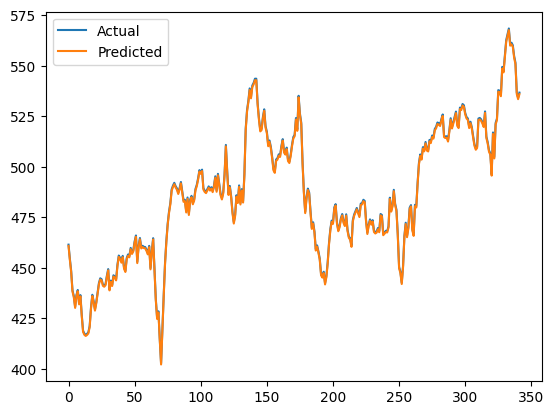

In [ ]:
# Trực quan hóa giá trị thực tế và giá trị dự đoán
df_pred[['Actual', 'Predicted']].plot()

In [ ]:
# Ramdom Forest
df_pred_rf = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred_rf['Predicted_RF'] = Y_val_pred_rf
df_pred_rf = df_pred_rf.reset_index()
df_pred_rf.loc[:, 'Ngày'] = pd.to_datetime(df_pred_rf['Ngày'], format='%d/%m/%Y')
df_pred_rf

<ipython-input-29-43b466a1654d>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_pred_rf.loc[:, 'Ngày'] = pd.to_datetime(df_pred_rf['Ngày'], format='%d/%m/%Y')


,Ngày,Actual,Predicted_RF
0,2011-08-31,461.42,461.0566
1,2011-08-30,454.56,453.3593
2,2011-08-29,448.50,448.9968
3,2011-08-26,438.82,438.8684
4,2011-08-25,436.02,435.9277
...,...,...,...
337,2010-04-26,554.68,554.3624
338,2010-04-22,551.44,551.1859
339,2010-04-21,536.67,535.9171
340,2010-04-20,534.12,533.2099


<Axes: >

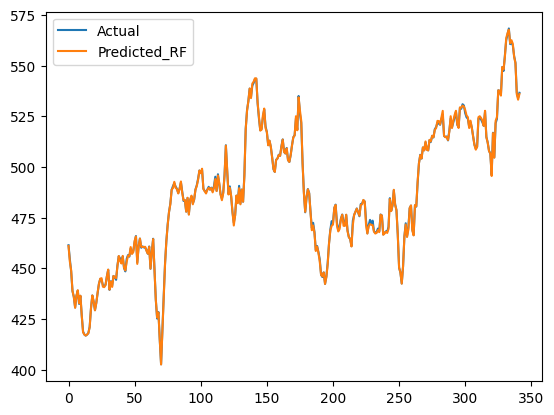

In [ ]:
df_pred_rf[['Actual', 'Predicted_RF']].plot()

In [ ]:
#Ensemble
df_pred_ensemble = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred_ensemble['Predicted_E'] = Y_val_pred_ensemble
df_pred_ensemble = df_pred_ensemble.reset_index()
df_pred_ensemble.loc[:, 'Ngày'] = pd.to_datetime(df_pred_rf['Ngày'], format='%d/%m/%Y')
df_pred_ensemble

<ipython-input-31-9911bc61d261>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_pred_ensemble.loc[:, 'Ngày'] = pd.to_datetime(df_pred_rf['Ngày'], format='%d/%m/%Y')


,Ngày,Actual,Predicted_E
0,2011-08-31,461.42,460.918673
1,2011-08-30,454.56,453.645062
2,2011-08-29,448.50,448.438262
3,2011-08-26,438.82,438.541171
4,2011-08-25,436.02,435.672878
...,...,...,...
337,2010-04-26,554.68,554.133082
338,2010-04-22,551.44,550.927212
339,2010-04-21,536.67,535.918659
340,2010-04-20,534.12,533.291932


<Axes: >

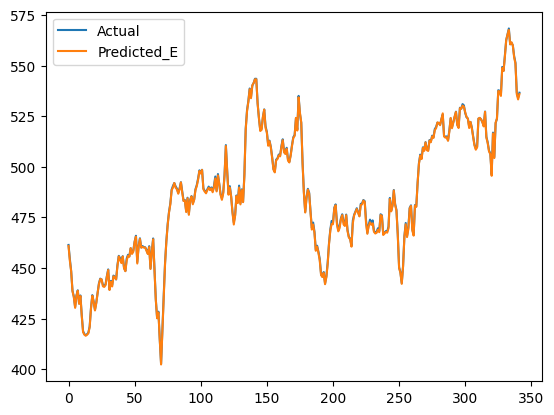

In [ ]:
df_pred_ensemble[['Actual', 'Predicted_E']].plot()